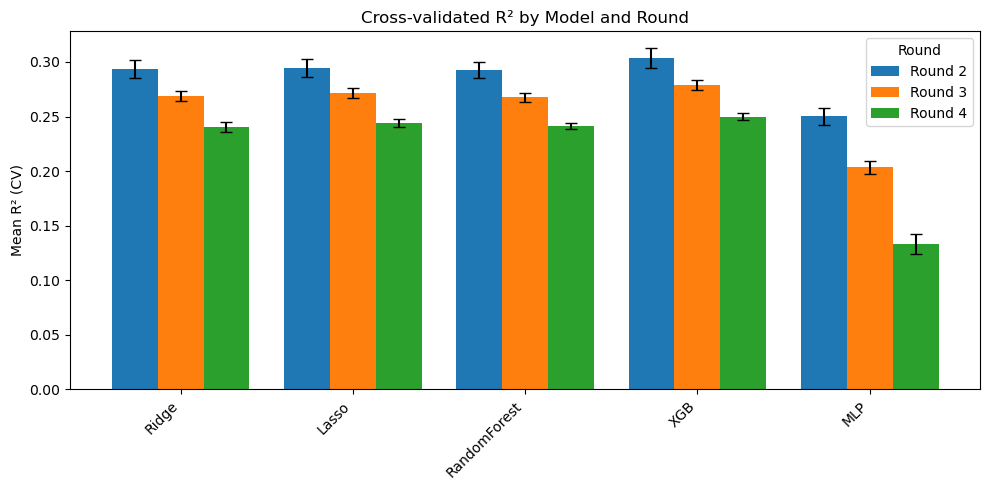

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and tag
dfs = []
for rnd in [2, 3, 4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol/results/eq5d_round{rnd}/eq5d_round{rnd}_gridsearch_cv_full_metrics.csv')
    df['Round'] = f'Round {rnd}'
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)

# === Plot R² with error bars ===
pivot_r2 = all_df.pivot(index='Model', columns='Round', values='Mean R2')
pivot_r2_err = all_df.pivot(index='Model', columns='Round', values='Std Error R2')
# Define desired model order
model_order = ['Ridge', 'Lasso', 'RandomForest', 'XGB', 'MLP']

# Reorder rows in pivot tables
pivot_r2 = pivot_r2.reindex(model_order)
pivot_r2_err = pivot_r2_err.reindex(model_order)


fig, ax = plt.subplots(figsize=(10, 5))
models = pivot_r2.index
rounds = pivot_r2.columns.tolist()
x = np.arange(len(models))
width = 0.8 / len(rounds)

for i, rnd in enumerate(rounds):
    ax.bar(x + i*width, pivot_r2[rnd], width, yerr=pivot_r2_err[rnd], label=rnd, capsize=4)

ax.set_xticks(x + width*(len(rounds)-1)/2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Mean R² (CV)')
ax.set_title('Cross-validated R² by Model and Round')
ax.legend(title='Round')
plt.tight_layout()
plt.show()


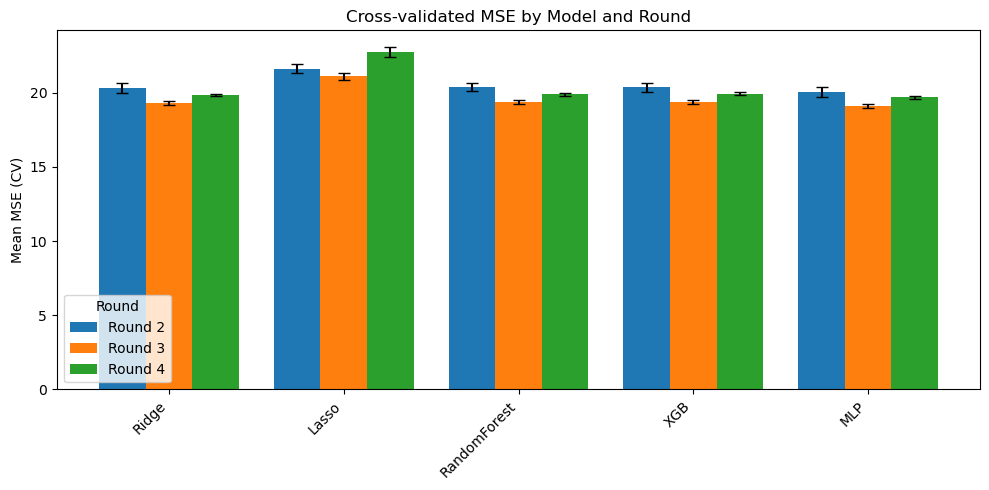

In [6]:
# === Plot MSE with error bars ===
pivot_mse = all_df.pivot(index='Model', columns='Round', values='Mean MSE')
pivot_mse_err = all_df.pivot(index='Model', columns='Round', values='Std Error MSE')
# Define desired model order
model_order = ['Ridge', 'Lasso', 'RandomForest', 'XGB', 'MLP']

# Reorder rows in pivot tables
pivot_r2 = pivot_r2.reindex(model_order)
pivot_r2_err = pivot_r2_err.reindex(model_order)


fig, ax = plt.subplots(figsize=(10, 5))
for i, rnd in enumerate(rounds):
    ax.bar(x + i*width, pivot_mse[rnd], width, yerr=pivot_mse_err[rnd], label=rnd, capsize=4)

ax.set_xticks(x + width*(len(rounds)-1)/2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Mean MSE (CV)')
ax.set_title('Cross-validated MSE by Model and Round')
ax.legend(title='Round')
plt.tight_layout()
plt.show()


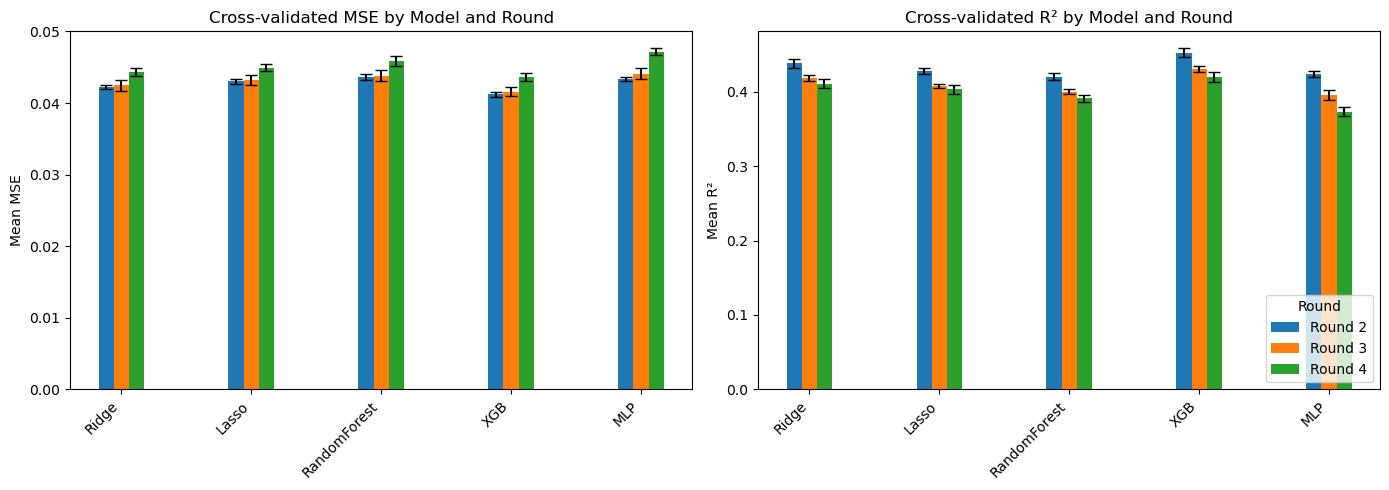

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and tag
dfs = []
for rnd in [2, 3, 4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol_cv/results/eq5d_round{rnd}/eq5d_round{rnd}_gridsearch_cv_full_metrics.csv')
    df['Round'] = f'Round {rnd}'
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)

# Desired order
model_order = ['Ridge', 'Lasso', 'RandomForest', 'XGB', 'MLP']

# Pivot and reorder
pivot_mse = all_df.pivot(index='Model', columns='Round', values='Mean MSE').reindex(model_order)
pivot_mse_err = all_df.pivot(index='Model', columns='Round', values='Std Error MSE').reindex(model_order)

pivot_r2 = all_df.pivot(index='Model', columns='Round', values='Mean R2').reindex(model_order)
pivot_r2_err = all_df.pivot(index='Model', columns='Round', values='Std Error R2').reindex(model_order)

# Plot settings
models = pivot_mse.index
rounds = pivot_mse.columns.tolist()
x = np.arange(len(models))
width = 0.35 / len(rounds)

# === Create Subplots ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# --- Plot MSE ---
for i, rnd in enumerate(rounds):
    axes[0].bar(x + i*width, pivot_mse[rnd], width, yerr=pivot_mse_err[rnd], label=rnd, capsize=4)
axes[0].set_ylabel('Mean MSE')
axes[0].set_title('Cross-validated MSE by Model and Round')
axes[0].set_xticks(x + width*(len(rounds)-1)/2)
axes[0].set_xticklabels(models, rotation=45, ha='right')

# --- Plot R² ---
for i, rnd in enumerate(rounds):
    axes[1].bar(x + i*width, pivot_r2[rnd], width, yerr=pivot_r2_err[rnd], label=rnd, capsize=4)
axes[1].set_ylabel('Mean R²')
axes[1].set_title('Cross-validated R² by Model and Round')
axes[1].set_xticks(x + width*(len(rounds)-1)/2)
axes[1].set_xticklabels(models, rotation=45, ha='right')

# Legend (only once)
axes[1].legend(title='Round', loc='lower right')

plt.tight_layout()
plt.savefig(('/rds/general/user/hsl121/home/hda_project/hrqol_cv/eq5d_combined_graph.png'), dpi=300)
plt.show()



<Figure size 1400x800 with 0 Axes>

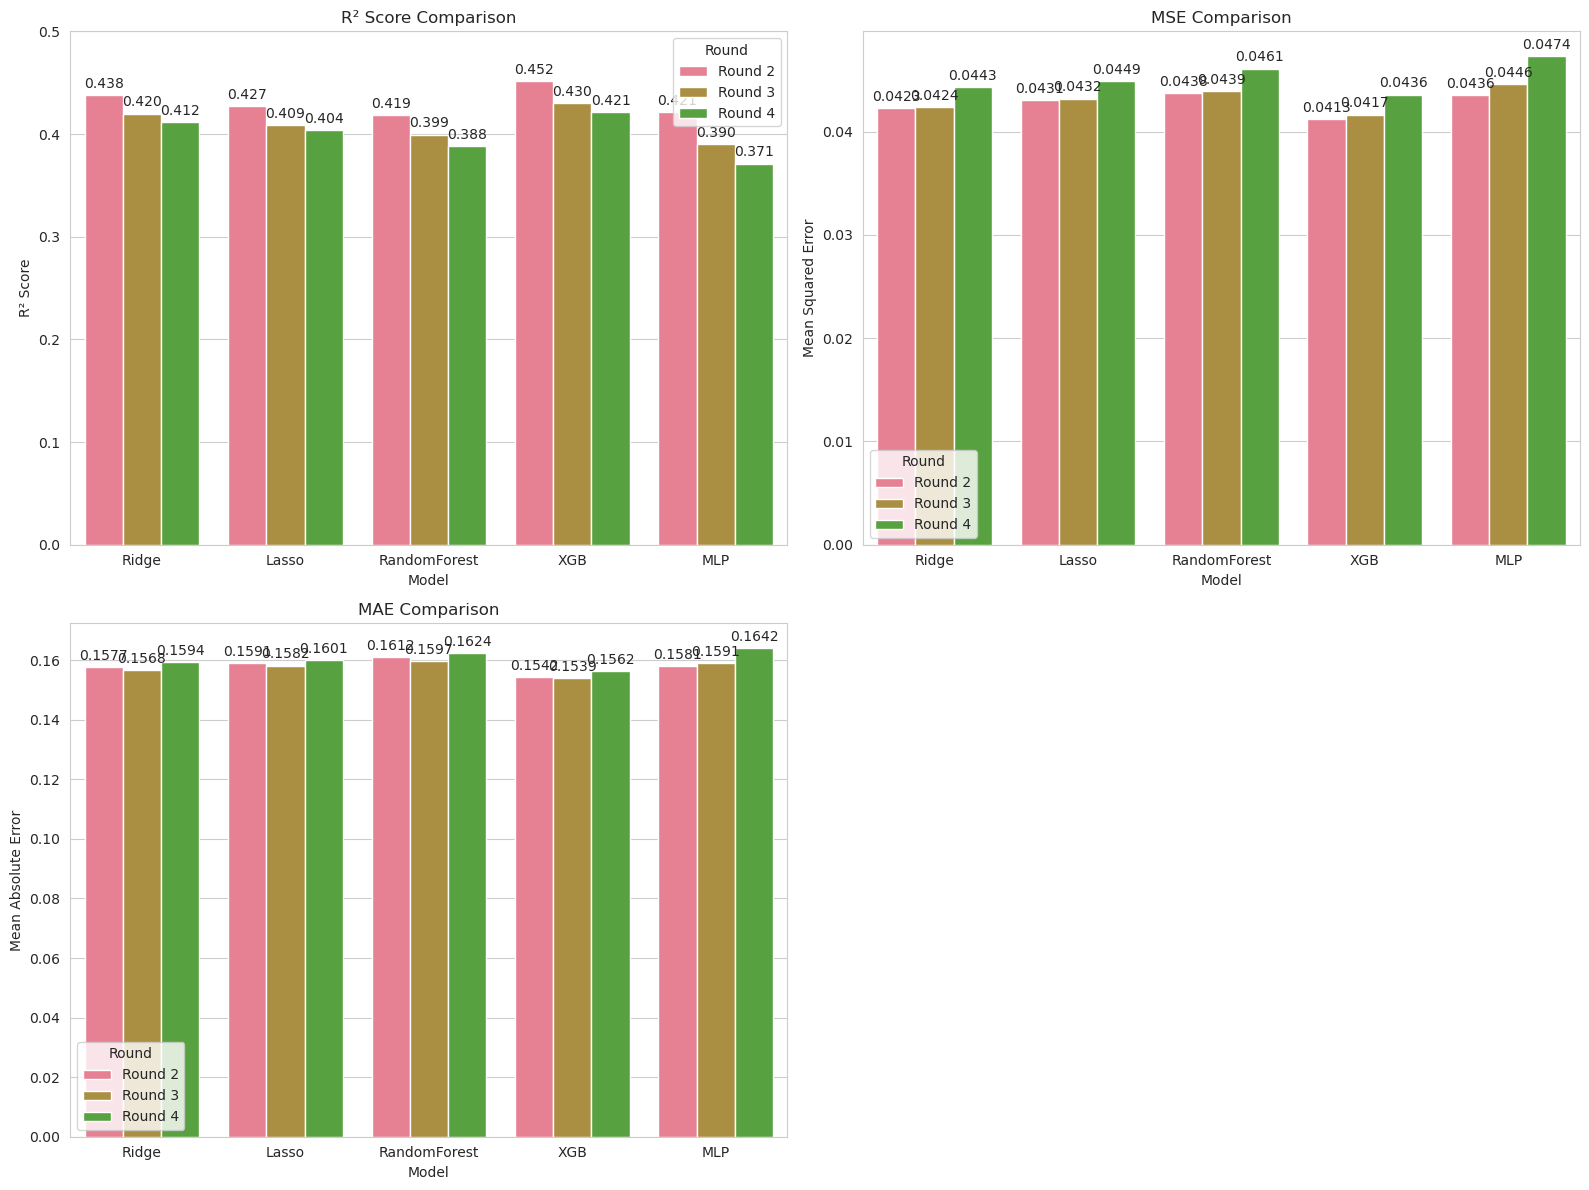

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and combine all rounds
dfs = []
for rnd in [2, 3, 4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol/results/eq5d_round{rnd}/eq5d_round{rnd}_results.csv')
    df['Round'] = f'Round {rnd}'
    dfs.append(df)
    
combined_df = pd.concat(dfs)

# Set up the visualization
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot R²
sns.barplot(data=combined_df, x='Model', y='r2_mean', hue='Round', 
            ax=axes[0,0], errorbar=None)
axes[0,0].set_title('R² Score Comparison')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_ylim(0, 0.5)
for container in axes[0,0].containers:
    axes[0,0].bar_label(container, fmt='%.3f', padding=3)

# Plot MSE
sns.barplot(data=combined_df, x='Model', y='mse_mean', hue='Round',
            ax=axes[0,1], errorbar=None)
axes[0,1].set_title('MSE Comparison')
axes[0,1].set_ylabel('Mean Squared Error')
for container in axes[0,1].containers:
    axes[0,1].bar_label(container, fmt='%.4f', padding=3)

# Plot MAE
sns.barplot(data=combined_df, x='Model', y='mae_mean', hue='Round',
            ax=axes[1,0], errorbar=None)
axes[1,0].set_title('MAE Comparison')
axes[1,0].set_ylabel('Mean Absolute Error')
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt='%.4f', padding=3)

# Plot Training Time (if available)
if 'fit_time_mean' in combined_df.columns:
    sns.barplot(data=combined_df, x='Model', y='fit_time_mean', hue='Round',
                ax=axes[1,1], errorbar=None)
    axes[1,1].set_title('Training Time Comparison')
    axes[1,1].set_ylabel('Time (seconds)')
    for container in axes[1,1].containers:
        axes[1,1].bar_label(container, fmt='%.1f', padding=3)
else:
    fig.delaxes(axes[1,1])  # Remove empty subplot if no time data

plt.tight_layout()
# plt.savefig('model_comparison_all_rounds.png', dpi=300, bbox_inches='tight')
plt.show()

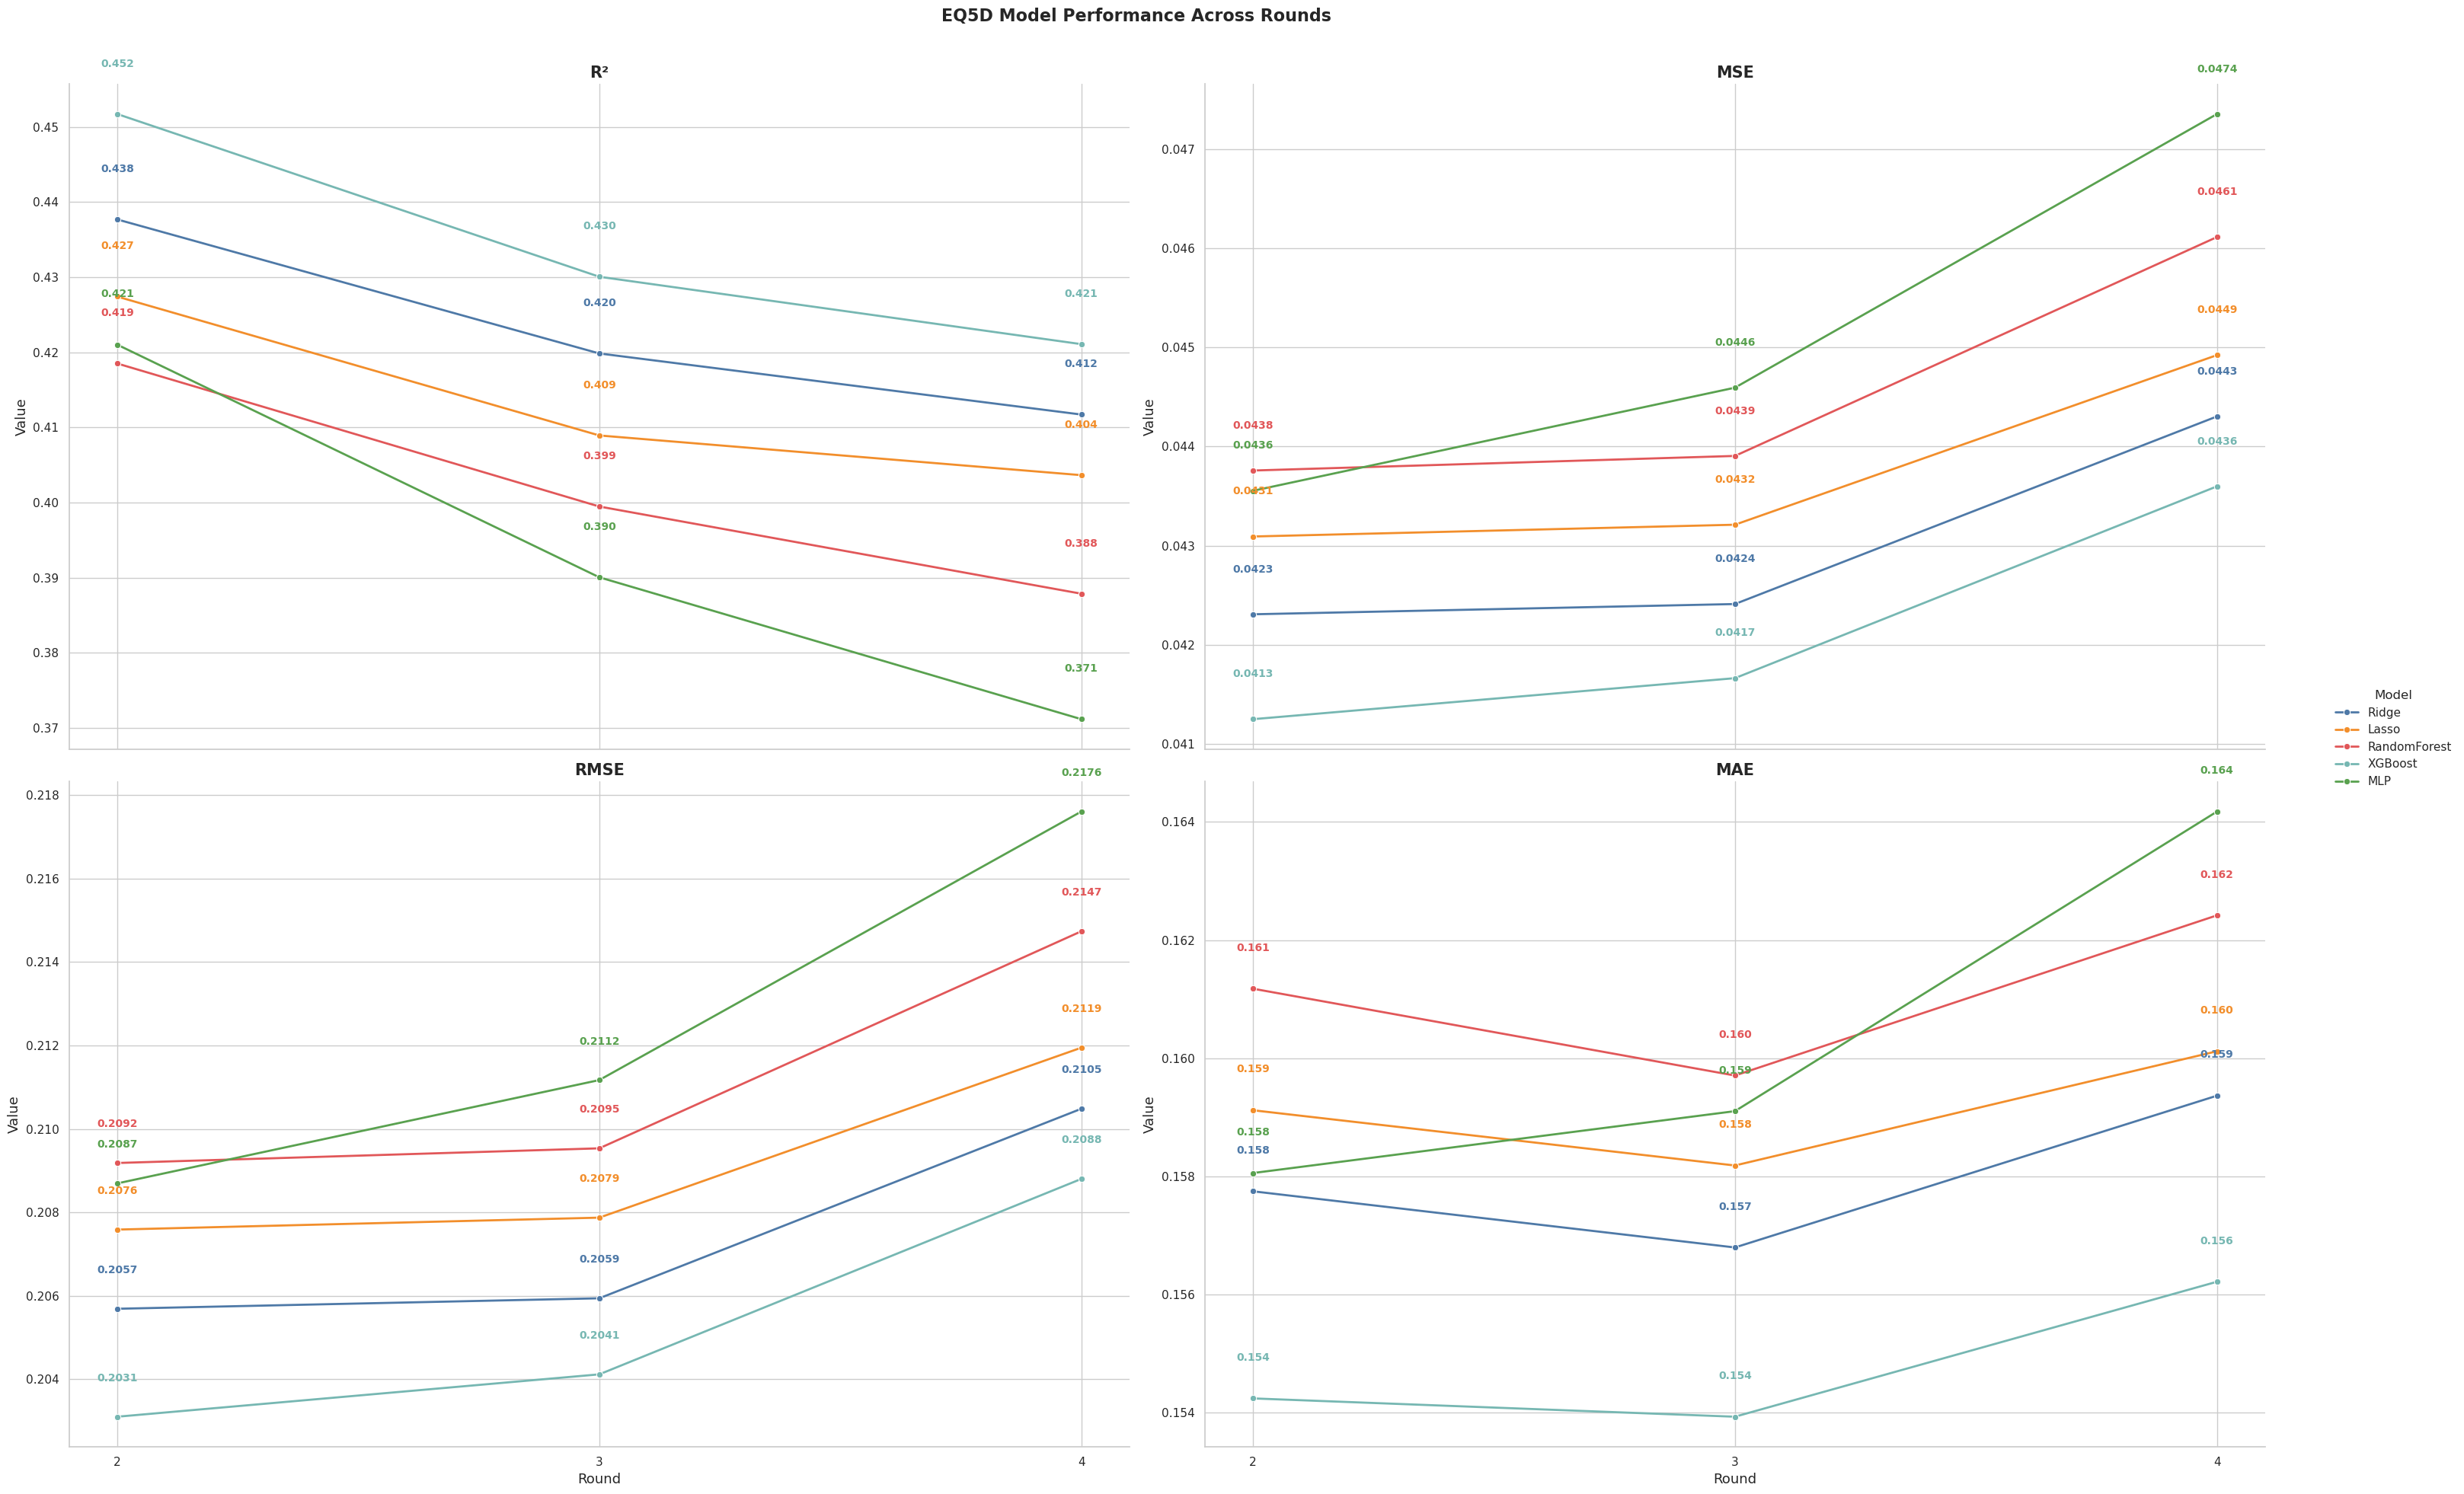

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and combine data
dfs = []
for rnd in [2, 3, 4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol/results/eq5d_round{rnd}/eq5d_round{rnd}_results.csv')
    df['Round'] = rnd
    df['rmse_mean'] = np.sqrt(df['mse_mean'])
    dfs.append(df)

combined_df = pd.concat(dfs)

# Rename XGB to XGBoost for consistency
combined_df['Model'] = combined_df['Model'].replace({'XGB': 'XGBoost'})

# Melt for plotting
melted_df = pd.melt(
    combined_df,
    id_vars=['Model', 'Round'],
    value_vars=['r2_mean', 'mse_mean', 'rmse_mean', 'mae_mean'],
    var_name='Metric',
    value_name='Value'
)

# Clean metric names
metric_names = {
    'r2_mean': 'R²',
    'mse_mean': 'MSE',
    'rmse_mean': 'RMSE',
    'mae_mean': 'MAE'
}
melted_df['Metric'] = melted_df['Metric'].map(metric_names)

# Custom color palette
palette = {
    'Ridge': '#4e79a7',
    'Lasso': '#f28e2b',
    'RandomForest': '#e15759',
    'XGBoost': '#76b7b2',
    'MLP': '#59a14f'
}

# Updated FacetGrid
g = sns.FacetGrid(
    melted_df, col='Metric', col_wrap=2,  # one plot per row
    hue='Model', height=10, aspect=1.7,  # make each plot wider
    palette=palette, sharey=False
)

g.map(sns.lineplot, 'Round', 'Value', marker='o', markersize=6, linewidth=2)

# Updated annotation section
for ax, metric in zip(g.axes.flat, melted_df['Metric'].unique()):
    metric_data = melted_df[melted_df['Metric'] == metric]
    for model in combined_df['Model'].unique():
        model_data = metric_data[metric_data['Model'] == model]
        for _, row in model_data.iterrows():
            # Finer offset control
            if metric == 'R²':
                y_offset = 0.006
            elif metric == 'MAE':
                y_offset = 0.0006
            elif metric == 'MSE':
                y_offset = 0.0004
            else:  # RMSE
                y_offset = 0.0008
            ax.text(row['Round'], row['Value'] + y_offset,
                    f'{row["Value"]:.4f}' if metric in ['MSE', 'RMSE'] else f'{row["Value"]:.3f}',
                    ha='center', va='bottom', fontsize=10,
                    color=palette[model], fontweight='bold')

    ax.set_title(metric, fontsize=15, fontweight='bold')
    ax.set_xlabel('Round', fontsize=13)
    ax.set_ylabel('Value', fontsize=13)
    ax.set_xticks([2, 3, 4])

# Adjust legend and layout
g.add_legend(title='Model', title_fontsize=12, fontsize=11, bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.gcf().set_size_inches(30, 20) 


plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle('EQ5D-5L Model Performance Across Rounds', fontsize=16, fontweight='bold')
plt.show()



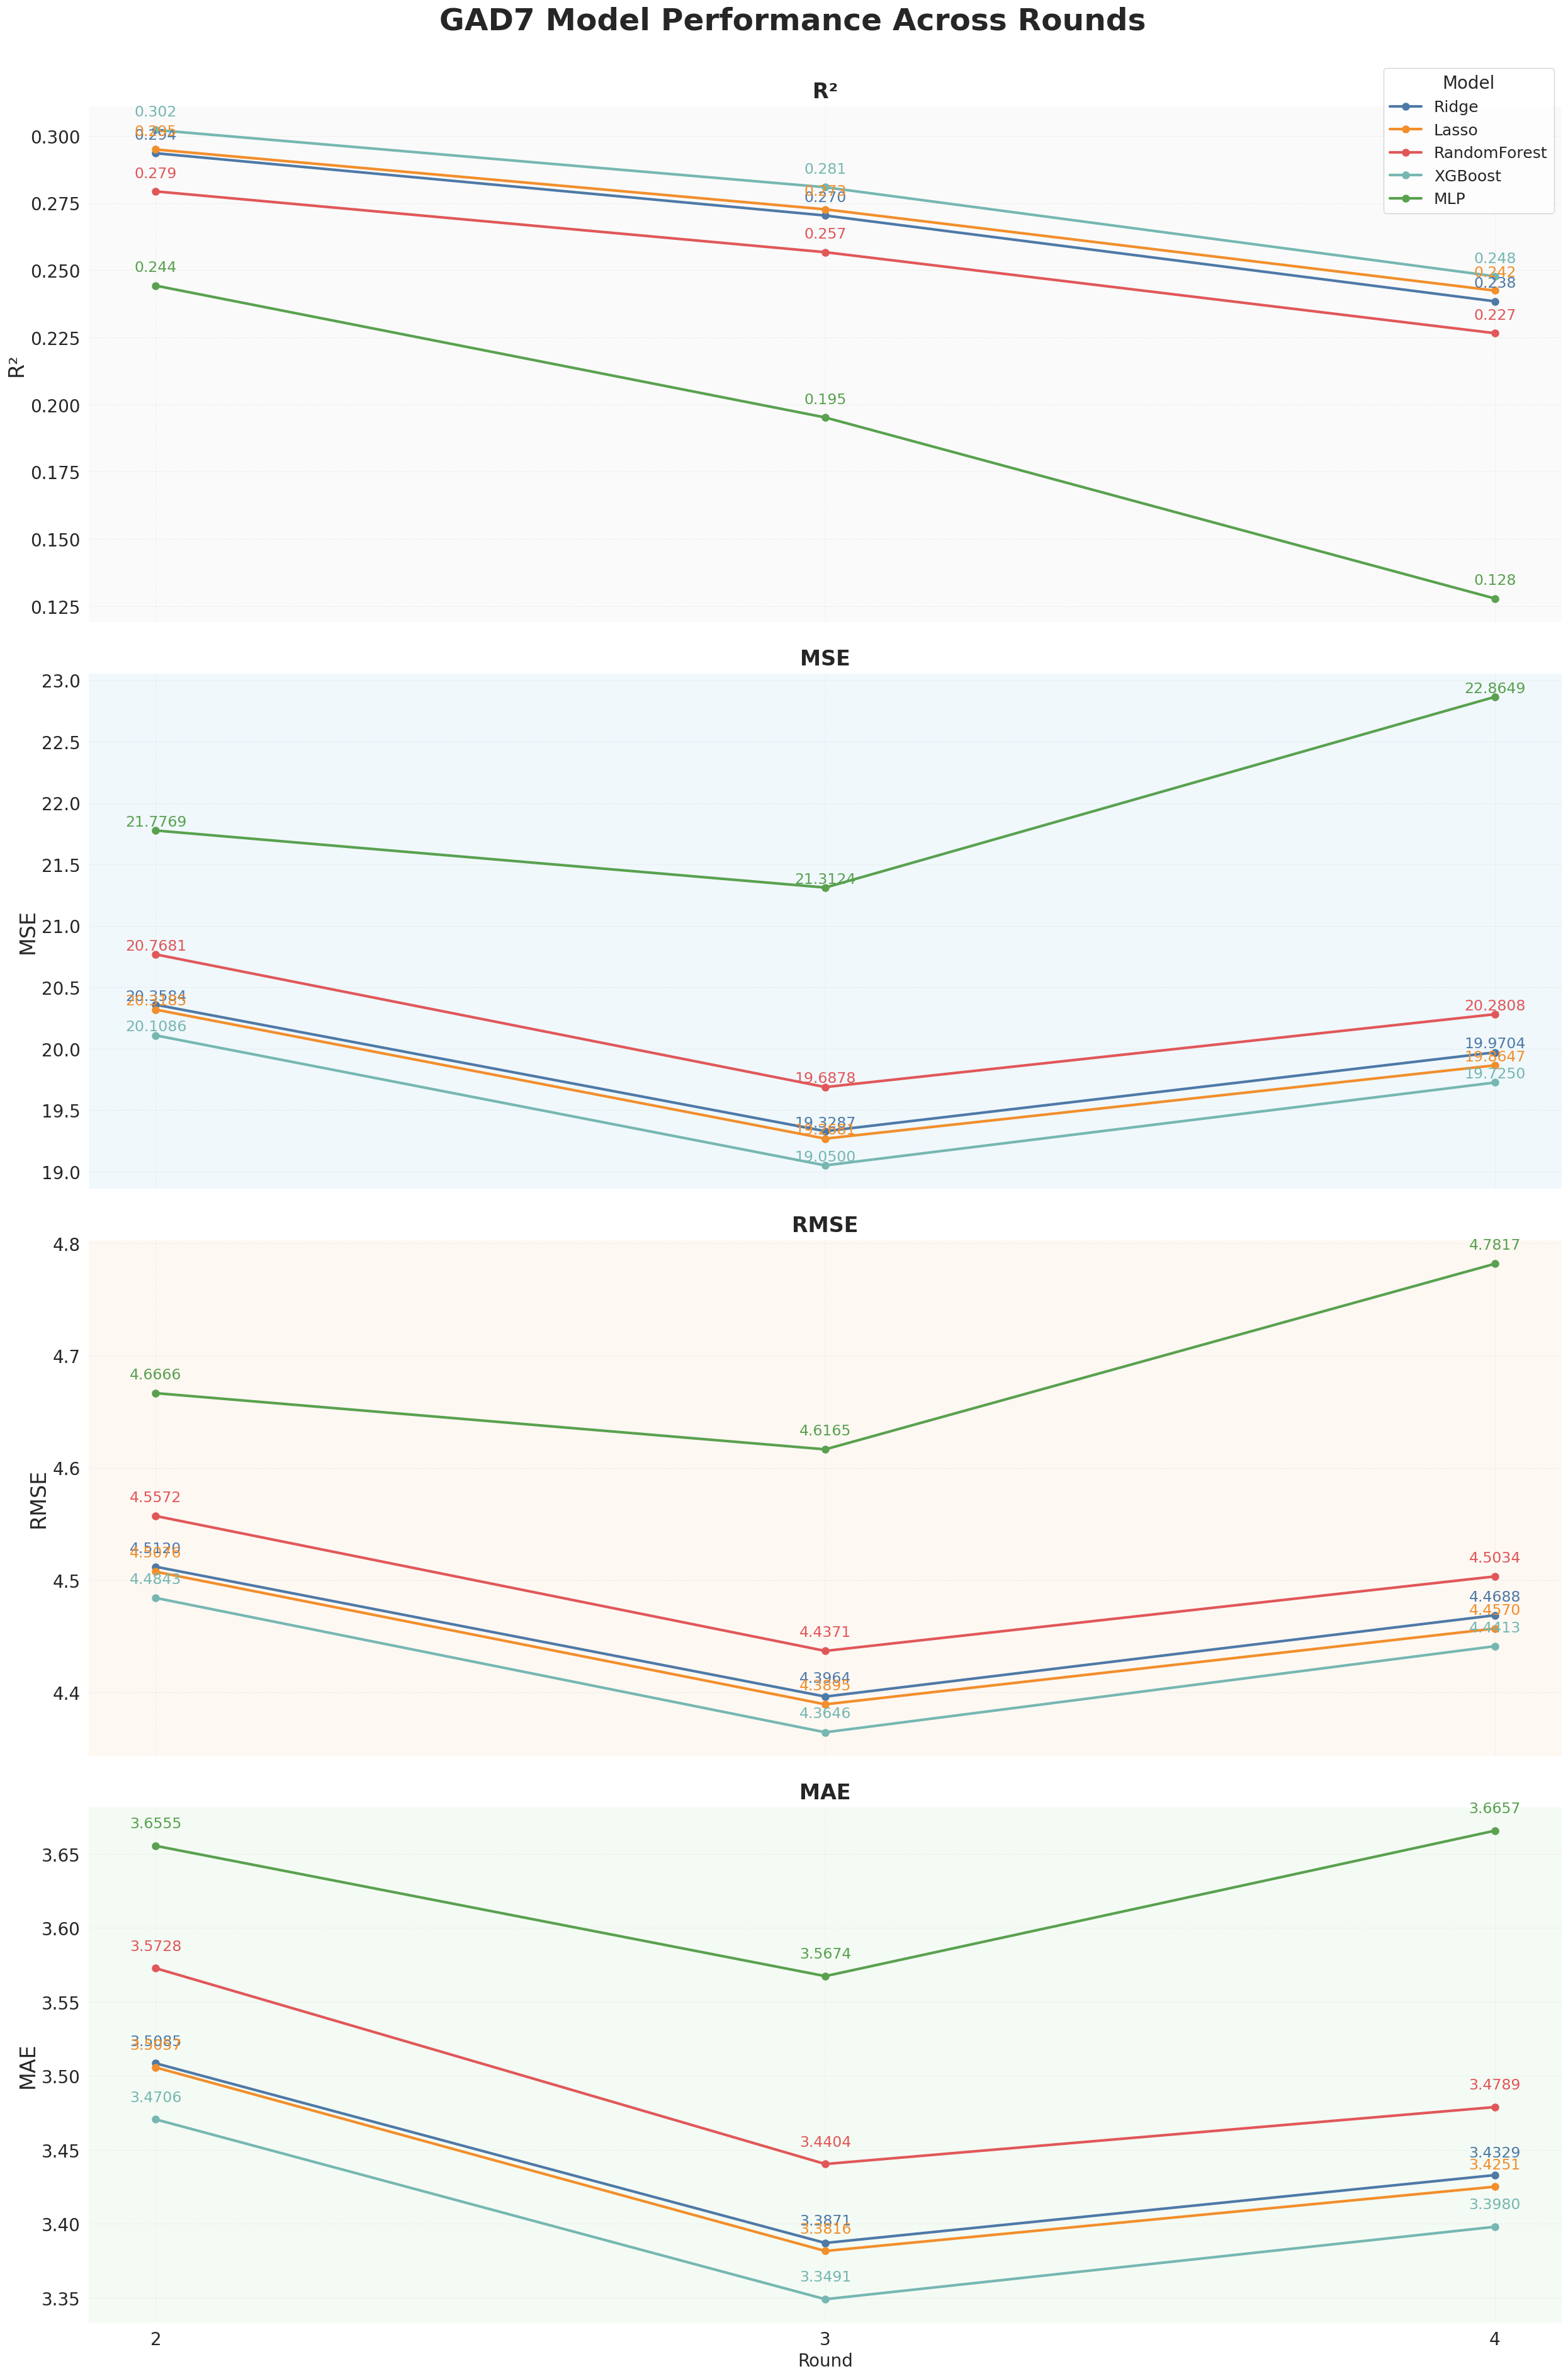

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====== LOAD DATA ======
dfs = []
for rnd in [2, 3, 4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol/results/gad7_round{rnd}/gad7_round{rnd}_results.csv')
    df['Round'] = rnd
    df['rmse_mean'] = np.sqrt(df['mse_mean'])
    dfs.append(df)

combined_df = pd.concat(dfs)
combined_df['Model'] = combined_df['Model'].replace({'XGB': 'XGBoost'})

# Melt for plotting
melted_df = pd.melt(
    combined_df,
    id_vars=['Model', 'Round'],
    value_vars=['r2_mean', 'mse_mean', 'rmse_mean', 'mae_mean'],
    var_name='Metric',
    value_name='Value'
)

metric_names = {
    'r2_mean': 'R²',
    'mse_mean': 'MSE',
    'rmse_mean': 'RMSE',
    'mae_mean': 'MAE'
}
melted_df['Metric'] = melted_df['Metric'].map(metric_names)

# ====== PLOTTING ======
sns.set(style="white")

palette = {
    'Ridge': '#4e79a7',
    'Lasso': '#f28e2b',
    'RandomForest': '#e15759',
    'XGBoost': '#76b7b2',
    'MLP': '#59a14f'
}

background_colors = {
    'R²': '#fafafa',    
    'MSE': '#f0f8fc',   
    'RMSE': '#fef8f3',
    'MAE': '#f4fbf4'    
}

# Setup subplots
fig, axes = plt.subplots(4, 1, figsize=(26, 40), sharex=True)
metrics = ['R²', 'MSE', 'RMSE', 'MAE']
fig.patch.set_facecolor('white')

for ax, metric in zip(axes, metrics):
    ax.set_facecolor(background_colors[metric])
    metric_data = melted_df[melted_df['Metric'] == metric]

    # Plot lines
    for model in combined_df['Model'].unique():
        model_data = metric_data[metric_data['Model'] == model]
        ax.plot(model_data['Round'], model_data['Value'],
                marker='o', markersize=8,
                linewidth=3, label=model, color=palette[model])

        # Annotate points
        for _, row in model_data.iterrows():
            y_offset = {
                'R²': 0.004,
                'MSE': 0.01,
                'RMSE': 0.01,
                'MAE': 0.01
            }[metric]
            ax.text(row['Round'], row['Value'] + y_offset,
                    f'{row["Value"]:.3f}' if metric == 'R²' else f'{row["Value"]:.4f}',
                    ha='center', va='bottom', fontsize=17, color=palette[model])

    # Minimal y-axis label & title
    ax.set_ylabel(metric, fontsize=24)
    ax.set_title(metric, fontsize=24, fontweight='bold', loc='center', pad=10)

    # Tidy up
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
    ax.tick_params(axis='both', labelsize=20)

# X-axis formatting
axes[-1].set_xlabel('Round', fontsize=20)
plt.xticks([2, 3, 4])

# Legend
axes[0].legend(
    title='Model',
    fontsize=18,
    title_fontsize=20,
    loc='upper right',
    bbox_to_anchor=(1, 1.09)  
)

# Layout
plt.subplots_adjust(top=0.94, hspace=0.1, left=0.07, right=0.97, bottom=0.06)
plt.suptitle('GAD7 Model Performance Across Rounds', fontsize=35, fontweight='bold')
plt.savefig('/rds/general/user/hsl121/home/hda_project/hrqol/gad7_combined_graph.png', dpi=300, bbox_inches='tight')
plt.show()
